In [112]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

In [113]:
datContent = pd.read_csv("data//spam.dat")
# iris = load_iris()
# datContent = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
#                         columns= iris['feature_names'] + ['target'])
datContent = datContent.rename(index=str, columns={"target": "K"})

In [114]:
datContent.head()

,ACT_NOW,ADDRESSES_ON_CD,ADULT_SITE,ADVERT_CODE,ADVERT_CODE2,ALL_CAPS_HEADER,ALL_CAP_PORN,ALL_NATURAL,AMATEUR_PORN,AMAZING,...,X_ENC_PRESENT,X_LIBRARY,X_LIST_UNSUBSCRIBE,X_MSMAIL_PRIORITY_HIGH,X_PRECEDENCE_REF,X_PRIORITY_HIGH,X_STORMPOST_TO,X_X_PRESENT,YOUR_INCOME,K
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,yes
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,no
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,yes
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,no
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,yes


In [115]:
datContent.shape

(4789, 463)

In [116]:
X = datContent.drop('K', axis = 1)

In [117]:
y = datContent.K

In [118]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2, mutual_info_classif

# test = SelectKBest(score_func=chi2, k=2)
# test.fit(X, y)

# scores = []
# num_features = len(X.columns)
# for i in range(num_features):
#     score = test.scores_[i]
#     scores.append((score, X.columns[i]))

# sortedFeatures = sorted(scores, reverse = True)
# sortedFeatures = list(map(lambda x: x[1], sortedFeatures))

In [119]:
# print (f'Features Ranking {sortedFeatures}')


In [120]:
# import seaborn as sns

# sns.set()
# sns.set_palette(sns.color_palette("hls", len(sortedFeatures)))
# sns.pairplot(datContent, vars=X.columns, hue='K', diag_kind='hist', dropna=True, kind='scatter')

In [121]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def countStats(_y_true, _y_pred):
    accuracy = accuracy_score(_y_true, _y_pred, normalize=True)
    precision = precision_score(_y_true, _y_pred, average='weighted')
    recall = recall_score(_y_true, _y_pred, average='weighted')
    fscore = f1_score(_y_true, _y_pred, average='weighted')
    
    return accuracy, precision, recall, fscore

In [131]:
from sklearn.model_selection import KFold
from sklearn import svm
from sklearn.metrics import confusion_matrix

def do_the_thing(model, name):
    
    print(f'{name}')
    
    ConfusionMatrixY = []
    ConfusionMatrixYpred = []

    tAccuracy = 0
    tPrecision = 0
    tRecall = 0
    tFScore = 0

    for i in range(0, 5):
        kf = KFold(n_splits = 2, shuffle = True)
        result = next(kf.split(datContent), None)

        train1 = datContent.iloc[result[0]]
        test1 =  datContent.iloc[result[1]]
        train2 = datContent.iloc[result[1]]
        test2 =  datContent.iloc[result[0]]

        # fold 1
        clf = model
        Xtrain = train1.drop('K', axis = 1)
        Ytrain = train1.K
        clf.fit(Xtrain, Ytrain)

        Xtest = test1.drop('K', axis = 1)
        Ytest = test1.K
        YPred = clf.predict(Xtest)

        ConfusionMatrixY = Ytest.tolist()
        ConfusionMatrixYpred = YPred.tolist()

        accuracy, precision, recall, fscore = countStats(Ytest, YPred)
        tAccuracy += accuracy
        tPrecision += precision
        tRecall += recall
        tFScore += fscore

        #fold 2
        clf = model
        Xtrain = train1.drop('K', axis = 1)
        Ytrain = train1.K
        clf.fit(Xtrain, Ytrain)

        Xtest = test1.drop('K', axis = 1)
        Ytest = test1.K
        YPred = clf.predict(Xtest)

        ConfusionMatrixY = ConfusionMatrixY + Ytest.tolist()
        ConfusionMatrixYpred = ConfusionMatrixYpred + YPred.tolist()

        accuracy, precision, recall, fscore = countStats(Ytest, YPred)
        tAccuracy += accuracy
        tPrecision += precision
        tRecall += recall
        tFScore += fscore

    cm = confusion_matrix(ConfusionMatrixY, ConfusionMatrixYpred)
    print(f'Accuracy: {tAccuracy/10}\nPrecision: {tPrecision/10}\nRecall: {tRecall/10}\nF-score: {tFScore/10}')

    print(f'Macierz konfuzji:')
    print(f'{cm}')

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    df_cm = pd.DataFrame(cm)
    sns.heatmap(df_cm, cmap="Blues", annot=True)

SVM_Linear
Accuracy: 0.9792066805845512
Precision: 0.9794786937474111
Recall: 0.9792066805845512
F-score: 0.9791329877443878
Macierz konfuzji:
[[2920   10]
 [  94 1766]]


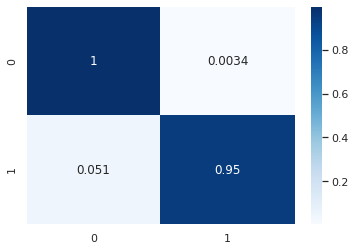

In [133]:
do_the_thing(model=svm.SVC(kernel='linear'), name='SVM_Linear')

SVM_Rbf
Accuracy: 0.98321503131524
Precision: 0.9833257721451405
Recall: 0.98321503131524
F-score: 0.9831721159047492
Macierz konfuzji:
[[2944   16]
 [  66 1764]]


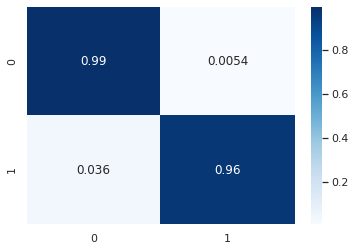

In [134]:
do_the_thing(model=svm.SVC(kernel='rbf'), name='SVM_Rbf')

SVM_Poly
Accuracy: 0.9531524008350731
Precision: 0.9562506185884556
Recall: 0.9531524008350731
F-score: 0.9525133381553763
Macierz konfuzji:
[[2922    0]
 [ 204 1664]]


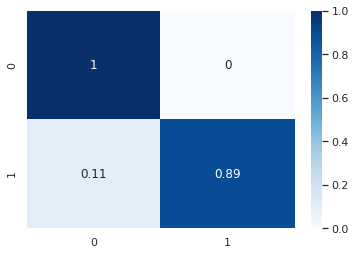

In [135]:
do_the_thing(model=svm.SVC(kernel='poly'), name='SVM_Poly')

SVM_Rbf_auto
Accuracy: 0.9578288100208768
Precision: 0.9601554175490907
Recall: 0.9578288100208768
F-score: 0.9573256930491454
Macierz konfuzji:
[[2922    4]
 [ 194 1670]]


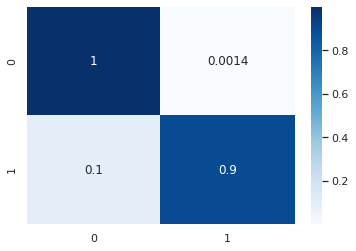

In [137]:
do_the_thing(model=svm.SVC(kernel='rbf', gamma='auto'), name='SVM_Rbf_auto')

KNN
Accuracy: 0.9179958246346555
Precision: 0.927266487474874
Recall: 0.9179958246346555
F-score: 0.9155802565111143
Macierz konfuzji:
[[2956    4]
 [ 330 1500]]


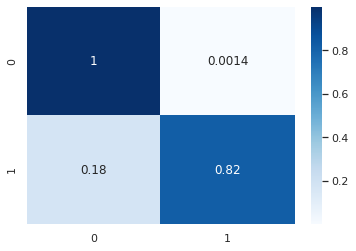

In [139]:
from sklearn.neighbors import KNeighborsClassifier

do_the_thing(KNeighborsClassifier(n_neighbors=5, metric='euclidean'), name='KNN')

Decision Tree
Accuracy: 0.9043841336116911
Precision: 0.905285986817802
Recall: 0.9043841336116911
F-score: 0.9046806266250182
Macierz konfuzji:
[[2722  266]
 [ 200 1602]]


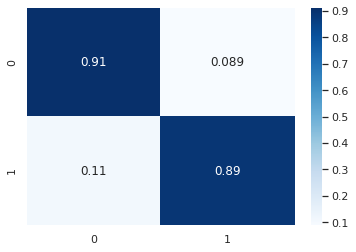

In [142]:
from sklearn.tree import DecisionTreeClassifier

do_the_thing(DecisionTreeClassifier(max_leaf_nodes=3, random_state=0), name='Decision Tree')